In [2]:
import pandas as pd
import numpy as np


# Load the data
df = pd.read_csv("filled_data_with_noisy_imputed(II).csv")
# Dropping columns 'B' and 'D'
df = df.drop(columns=['Year', 'Month', 'DayOfYear','Hour' ])
df['DateTime'] = pd.to_datetime(df['DateTime'])
# Set the 'datetime' column as the index
#df.set_index('DateTime', inplace=True)

df.head()

,DateTime,Load
0,2019-03-29 01:00:00,305.032220
1,2019-03-29 02:00:00,272.552310
2,2019-03-29 03:00:00,258.534027
3,2019-03-29 04:00:00,250.893882
4,2019-03-29 05:00:00,248.525866


In [3]:
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['day_of_week'] = df['DateTime'].dt.day_of_week
df['day_of_year'] = df['DateTime'].dt.day_of_year

In [4]:
"""Month1:
5am to 11am
14pm to 18 pm

Month2:
5am to 11am
14pm to 18 pm

Month3:
7am to 12am
16pm to 20 pm

Month4:
7am to 12am
15pm to 20 pm

Month5:
6am to 12am
18pm to 20 pm

Month6:
6am to 12am
-

Month7:
6am to 12am
-

Month8:
6am to 12am
-
Month9:
6am to 12am
-

Month10:
6am to 11am
14pm to 19pm

Month11:
6am to 11am
15pm to 18pm

Month12:
5am to 11am
14pm to 18pm

"""

def day_part(hour):
    if hour in [4,5]:
        return "dawn"
    elif hour in [6,7]:
        return "early morning"
    elif hour in [8,9,10]:
        return "late morning"
    elif hour in [11,12,13]:
        return "noon"
    elif hour in [14,15,16]:
        return "afternoon"
    elif hour in [17, 18,19]:
        return "evening"
    elif hour in [20, 21, 22]:
        return "night"
    elif hour in [23,24,1,2,3]:
        return "midnight"


# utilize it along with apply method
df['hour'] = df['DateTime'].dt.hour
df['date_issued:day_part'] = df['hour'].apply(day_part)
#df.head()


In [5]:
df.head()

,DateTime,Load,year,month,day,day_of_week,day_of_year,hour,date_issued:day_part
0,2019-03-29 01:00:00,305.032220,2019,3,29,4,88,1,midnight
1,2019-03-29 02:00:00,272.552310,2019,3,29,4,88,2,midnight
2,2019-03-29 03:00:00,258.534027,2019,3,29,4,88,3,midnight
3,2019-03-29 04:00:00,250.893882,2019,3,29,4,88,4,dawn
4,2019-03-29 05:00:00,248.525866,2019,3,29,4,88,5,dawn


In [6]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding
label_encoder = LabelEncoder()
df['day_part_encoded'] = label_encoder.fit_transform(df['date_issued:day_part'])
df.drop('date_issued:day_part', axis=1, inplace=True)
df.head()

,DateTime,Load,year,month,day,day_of_week,day_of_year,hour,day_part_encoded
0,2019-03-29 01:00:00,305.032220,2019,3,29,4,88,1,5
1,2019-03-29 02:00:00,272.552310,2019,3,29,4,88,2,5
2,2019-03-29 03:00:00,258.534027,2019,3,29,4,88,3,5
3,2019-03-29 04:00:00,250.893882,2019,3,29,4,88,4,1
4,2019-03-29 05:00:00,248.525866,2019,3,29,4,88,5,1


In [7]:
df['is_year_start'] = df['DateTime'].dt.is_year_start
df['is_quarter_start'] = df['DateTime'].dt.is_quarter_start
df['is_month_start'] = df['DateTime'].dt.is_month_start
df['is_month_end'] = df['DateTime'].dt.is_month_end

df['is_weekend'] = np.where(df['day_of_week'].isin([3,4]), 1,0)

#df[['datetime','date_issued:is_year_start','date_issued:is_quarter_start','date_issued:is_month_start','date_issued:is_month_end']].head()

df['week_number'] = df['DateTime'].dt.isocalendar().week
df.head()

,DateTime,Load,year,month,day,day_of_week,day_of_year,hour,day_part_encoded,is_year_start,is_quarter_start,is_month_start,is_month_end,is_weekend,week_number
0,2019-03-29 01:00:00,305.032220,2019,3,29,4,88,1,5,False,False,False,False,1,13
1,2019-03-29 02:00:00,272.552310,2019,3,29,4,88,2,5,False,False,False,False,1,13
2,2019-03-29 03:00:00,258.534027,2019,3,29,4,88,3,5,False,False,False,False,1,13
3,2019-03-29 04:00:00,250.893882,2019,3,29,4,88,4,1,False,False,False,False,1,13
4,2019-03-29 05:00:00,248.525866,2019,3,29,4,88,5,1,False,False,False,False,1,13


In [8]:
# Specify the columns you want to keep, including the new calendar variables
columns_to_keep = ['DateTime', 'Load',
                   'month', 'day_of_week', 'day_part_encoded', 'is_weekend']

# Use indexing to select the desired columns
data = df[columns_to_keep]
data.set_index('DateTime', inplace=True)
data

,Load,month,day_of_week,day_part_encoded,is_weekend
DateTime,,,,,
2019-03-29 01:00:00,305.032220,3,4,5,1
2019-03-29 02:00:00,272.552310,3,4,5,1
2019-03-29 03:00:00,258.534027,3,4,5,1
2019-03-29 04:00:00,250.893882,3,4,1,1
2019-03-29 05:00:00,248.525866,3,4,1,1
...,...,...,...,...,...
2023-12-05 19:00:00,495.382167,12,1,3,0
2023-12-05 20:00:00,478.786327,12,1,6,0
2023-12-05 21:00:00,460.352612,12,1,6,0


In [9]:
def cyclical_encoding(data: pd.Series, cycle_length: int) -> pd.DataFrame:
    """
    Encode a cyclical feature with two new features sine and cosine.
    The minimum value of the feature is assumed to be 0. The maximum value
    of the feature is passed as an argument.

    Parameters
    ----------
    data : pd.Series
        Series with the feature to encode.
    cycle_length : int
        The length of the cycle. For example, 12 for months, 24 for hours, etc.
        This value is used to calculate the angle of the sin and cos.

    Returns
    -------
    pd.DataFrame
        Dataframe with the two new features sin and cos.

    """

    sin = np.sin(2 * np.pi * data/cycle_length)
    cos = np.cos(2 * np.pi * data/cycle_length)
    result =  pd.DataFrame({
                  f"{data.name}_sin": sin,
                  f"{data.name}_cos": cos
              })

    return result

calendar_features= data

# Ciclical encoding of month, day of week and hour
# ==============================================================================
month_encoded = cyclical_encoding(calendar_features['month'], cycle_length=12)
day_of_week_encoded = cyclical_encoding(calendar_features['day_of_week'], cycle_length=7)
#hour_encoded = cyclical_encoding(calendar_features['hour'], cycle_length=24)
#day_of_year_encoded = cyclical_encoding(calendar_features['day_of_year'], cycle_length=365)
#day_of_month_encoded = cyclical_encoding(calendar_features['day_of_month'], cycle_length=30)

cyclical_features = pd.concat([ month_encoded, day_of_week_encoded], axis=1)
cyclical_features.head()

,month_sin,month_cos,day_of_week_sin,day_of_week_cos
DateTime,,,,
2019-03-29 01:00:00,1.0,6.123234e-17,-0.433884,-0.900969
2019-03-29 02:00:00,1.0,6.123234e-17,-0.433884,-0.900969
2019-03-29 03:00:00,1.0,6.123234e-17,-0.433884,-0.900969
2019-03-29 04:00:00,1.0,6.123234e-17,-0.433884,-0.900969
2019-03-29 05:00:00,1.0,6.123234e-17,-0.433884,-0.900969


In [10]:
newdf2 = data.merge(cyclical_features, on='DateTime')
newdf2=newdf2.drop(columns=['day_of_week', 'month'])
newdf2.head()


,Load,day_part_encoded,is_weekend,month_sin,month_cos,day_of_week_sin,day_of_week_cos
DateTime,,,,,,,
2019-03-29 01:00:00,305.032220,5,1,1.0,6.123234e-17,-0.433884,-0.900969
2019-03-29 02:00:00,272.552310,5,1,1.0,6.123234e-17,-0.433884,-0.900969
2019-03-29 03:00:00,258.534027,5,1,1.0,6.123234e-17,-0.433884,-0.900969
2019-03-29 04:00:00,250.893882,1,1,1.0,6.123234e-17,-0.433884,-0.900969
2019-03-29 05:00:00,248.525866,1,1,1.0,6.123234e-17,-0.433884,-0.900969


In [ ]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41111 entries, 2019-03-29 01:00:00 to 2023-12-05 23:00:00
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Load              41111 non-null  float64
 1   day_part_encoded  41111 non-null  int64  
 2   is_weekend        41111 non-null  int64  
 3   month_sin         41111 non-null  float64
 4   month_cos         41111 non-null  float64
 5   day_of_week_sin   41111 non-null  float64
 6   day_of_week_cos   41111 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 2.5 MB


In [12]:

# Reset the index
newdf2_reset = newdf2.reset_index()

# Save data to CSV
newdf2_reset.to_csv('load+cal(2019-2023)(II).csv', index=False)


In [13]:
newdf2_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41111 entries, 0 to 41110
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          41111 non-null  datetime64[ns]
 1   Load              41111 non-null  float64       
 2   day_part_encoded  41111 non-null  int64         
 3   is_weekend        41111 non-null  int64         
 4   month_sin         41111 non-null  float64       
 5   month_cos         41111 non-null  float64       
 6   day_of_week_sin   41111 non-null  float64       
 7   day_of_week_cos   41111 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 2.5 MB


**Outliers**

In [14]:
df2 = pd.read_csv("load+cal(2019-2023)(II).csv")
df2['DateTime'] = pd.to_datetime(df2['DateTime'])
df2

,DateTime,Load,day_part_encoded,is_weekend,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,2019-03-29 01:00:00,305.032220,5,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
1,2019-03-29 02:00:00,272.552310,5,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
2,2019-03-29 03:00:00,258.534027,5,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
3,2019-03-29 04:00:00,250.893882,1,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
4,2019-03-29 05:00:00,248.525866,1,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...
41106,2023-12-05 19:00:00,495.382167,3,0,-2.449294e-16,1.000000e+00,0.781831,0.623490
41107,2023-12-05 20:00:00,478.786327,6,0,-2.449294e-16,1.000000e+00,0.781831,0.623490
41108,2023-12-05 21:00:00,460.352612,6,0,-2.449294e-16,1.000000e+00,0.781831,0.623490
41109,2023-12-05 22:00:00,438.425956,6,0,-2.449294e-16,1.000000e+00,0.781831,0.623490


In [15]:
df2.set_index('DateTime', inplace=True)

In [16]:
!pip install sktime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.9/36.9 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 10.8 MB/s eta 0:00:00


In [17]:
import pandas as pd
from sktime.transformations.series.outlier_detection import HampelFilter

# Ensure `df2` is a DataFrame with a proper datetime index
df2 = df2.copy()
df2.index = pd.to_datetime(df2.index)  # Convert index to DateTimeIndex

# Define the cutoff date
cutoff_date = "2022-03-20 00:00:00"

# Select "Load" column
if "Load" not in df2.columns:
    raise ValueError("Column 'Load' not found in the dataset.")

# Split the data
data_before = df2[df2.index < cutoff_date]  # Keep untouched
data_after = df2[df2.index >= cutoff_date]  # Apply filter

# Ensure data_after is not empty
if data_after.empty:
    print("No data available after the cutoff date. Skipping outlier removal.")
    cleaned_data = df2  # Return original data
else:
    # Ensure the "Load" column has a proper index
    data_after_load = data_after["Load"].copy()
    data_after_load.index = pd.to_datetime(data_after_load.index)  # Convert to datetime

    # Only apply Hampel Filter if there are enough data points
    if len(data_after_load) > 10:  # `window_length` must be smaller than data length
        transformer = HampelFilter(window_length=10)
        data_after["Load"] = transformer.fit_transform(data_after_load)
    else:
        print("Not enough data points after cutoff for Hampel filtering. Skipping outlier removal.")

    # Combine both parts back
    cleaned_data = pd.concat([data_before, data_after])



<ipython-input-17-df0185d26073>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after["Load"] = transformer.fit_transform(data_after_load)


In [18]:
print(df2.index.min(), df2.index.max())


2019-03-29 01:00:00 2023-12-05 23:00:00


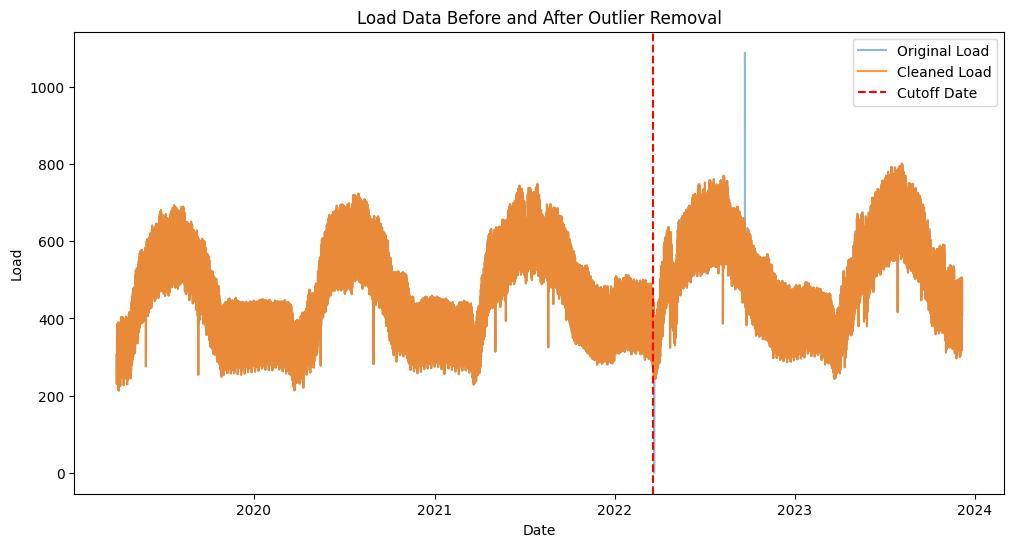

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert cutoff date to datetime format
cutoff_date = pd.to_datetime("2022-03-20")

# Plot the original vs. cleaned data
plt.figure(figsize=(12, 6))
plt.plot(df2["Load"], label="Original Load", alpha=0.5)  # Original data
plt.plot(cleaned_data["Load"], label="Cleaned Load", alpha=0.8)  # After outlier removal

# Fix: Convert cutoff_date to datetime before using it in axvline
plt.axvline(x=cutoff_date, color="red", linestyle="--", label="Cutoff Date")

plt.legend()
plt.title("Load Data Before and After Outlier Removal")
plt.xlabel("Date")
plt.ylabel("Load")
plt.show()


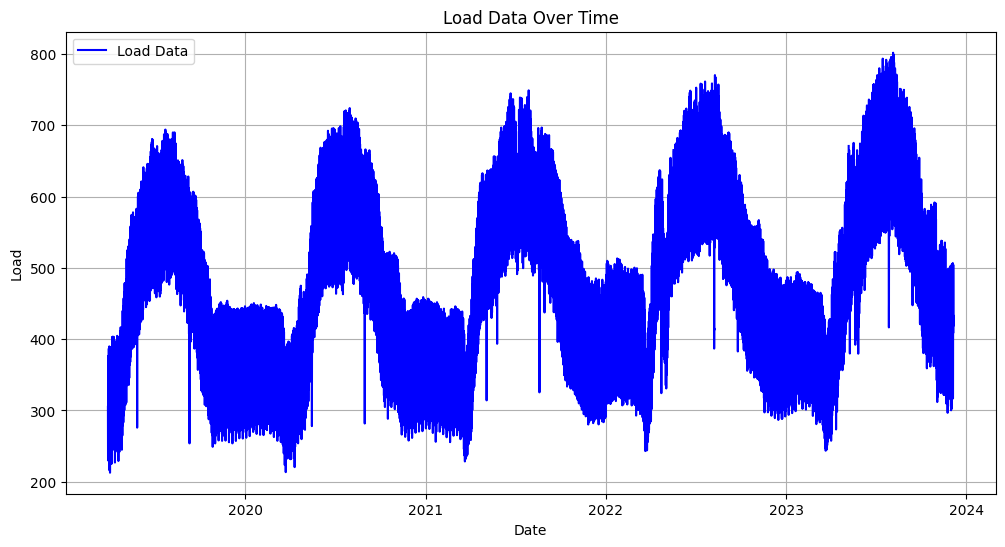

In [20]:
import matplotlib.pyplot as plt

# Plot Load data
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data["Load"], label="Load Data", color="blue")

# Formatting
plt.title("Load Data Over Time")
plt.xlabel("Date")
plt.ylabel("Load")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [21]:
cleaned_data

,Load,day_part_encoded,is_weekend,month_sin,month_cos,day_of_week_sin,day_of_week_cos
DateTime,,,,,,,
2019-03-29 01:00:00,305.032220,5,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
2019-03-29 02:00:00,272.552310,5,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
2019-03-29 03:00:00,258.534027,5,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
2019-03-29 04:00:00,250.893882,1,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
2019-03-29 05:00:00,248.525866,1,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
...,...,...,...,...,...,...,...
2023-12-05 19:00:00,495.382167,3,0,-2.449294e-16,1.000000e+00,0.781831,0.623490
2023-12-05 20:00:00,478.786327,6,0,-2.449294e-16,1.000000e+00,0.781831,0.623490
2023-12-05 21:00:00,460.352612,6,0,-2.449294e-16,1.000000e+00,0.781831,0.623490


In [22]:
# Check for NaN values in the cleaned data
nan_counts = cleaned_data.isna().sum()

# Display columns with NaN values
print("NaN values per column:")
print(nan_counts[nan_counts > 0])


NaN values per column:
Load    65
dtype: int64


In [23]:
# Find rows with NaN values
nan_rows = cleaned_data[cleaned_data.isna().any(axis=1)]
nan_rows

,Load,day_part_encoded,is_weekend,month_sin,month_cos,day_of_week_sin,day_of_week_cos
DateTime,,,,,,,
2022-03-20 00:00:00,NaN,8,0,1.000000,6.123234e-17,-0.781831,0.623490
2022-03-22 00:00:00,NaN,8,0,1.000000,6.123234e-17,0.781831,0.623490
2022-04-30 20:00:00,NaN,6,0,0.866025,-5.000000e-01,-0.974928,-0.222521
2022-05-04 20:00:00,NaN,6,0,0.500000,-8.660254e-01,0.974928,-0.222521
2022-05-04 21:00:00,NaN,6,0,0.500000,-8.660254e-01,0.974928,-0.222521
...,...,...,...,...,...,...,...
2023-09-28 19:00:00,NaN,3,1,-1.000000,-1.836970e-16,0.433884,-0.900969
2023-09-30 18:00:00,NaN,3,0,-1.000000,-1.836970e-16,-0.974928,-0.222521
2023-09-30 19:00:00,NaN,3,0,-1.000000,-1.836970e-16,-0.974928,-0.222521


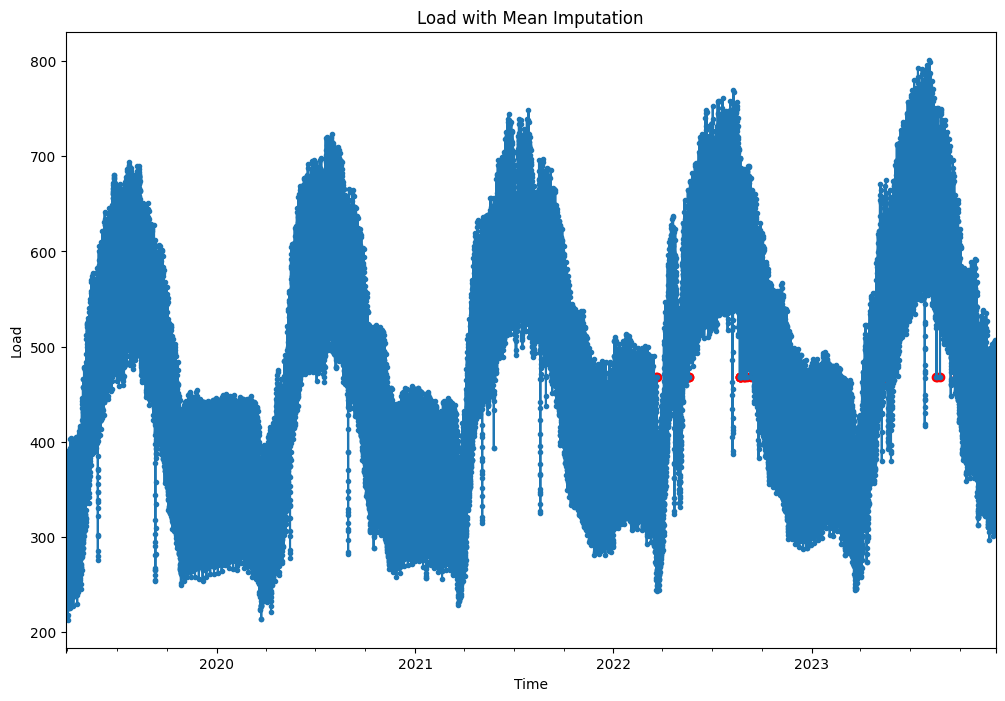

In [24]:
import matplotlib.pyplot as plt



# Apply the mean imputation method
df_imputed = cleaned_data.fillna(cleaned_data['Load'].mean())

# Plot the main line with markers
df_imputed['Load'].plot(style='.-', figsize=(12,8), title='Load with Mean Imputation')

# Add points where data was imputed with red color
imputed_indices = cleaned_data[cleaned_data['Load'].isnull()].index
plt.scatter(imputed_indices, df_imputed.loc[imputed_indices, 'Load'], color='red')

# Set labels
plt.xlabel('Time')
plt.ylabel('Load')

plt.show()

In [25]:

# Check for missing values in each column
missing_values = df_imputed.isnull().sum()

# Print the results
missing_values


,0
Load,0
day_part_encoded,0
is_weekend,0
month_sin,0
month_cos,0
day_of_week_sin,0
day_of_week_cos,0


In [26]:
df_imputed

,Load,day_part_encoded,is_weekend,month_sin,month_cos,day_of_week_sin,day_of_week_cos
DateTime,,,,,,,
2019-03-29 01:00:00,305.032220,5,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
2019-03-29 02:00:00,272.552310,5,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
2019-03-29 03:00:00,258.534027,5,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
2019-03-29 04:00:00,250.893882,1,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
2019-03-29 05:00:00,248.525866,1,1,1.000000e+00,6.123234e-17,-0.433884,-0.900969
...,...,...,...,...,...,...,...
2023-12-05 19:00:00,495.382167,3,0,-2.449294e-16,1.000000e+00,0.781831,0.623490
2023-12-05 20:00:00,478.786327,6,0,-2.449294e-16,1.000000e+00,0.781831,0.623490
2023-12-05 21:00:00,460.352612,6,0,-2.449294e-16,1.000000e+00,0.781831,0.623490


In [27]:

df_imputed = df_imputed.reset_index()
df_imputed.to_csv('load+cal(2019-2023)_removedoutliers(II).csv', index=False)


In [28]:

# Count the number of 0 values in each column
num_zeros = (cleaned_data == 0).sum()

# Show the number of 0 values in each column
num_zeros

,0
Load,0
day_part_encoded,5139
is_weekend,29376
month_sin,0
month_cos,0
day_of_week_sin,5880
day_of_week_cos,0
